# Working with GeoDataFrames

Simple explorations of the geopandas geoDataFrame object and map plotting.
Uses a very simple dataframe with just 5 datapoints (the 5 boros of NYC).

I've basically taken the ipython notebook from http://public.enthought.com/~kjordahl/pydata/slides/#13 and added my own experiments and notes. 

Documentation for geopandas is pretty thin.  Here I've relied on 

- [Official docs](http://geopandas.readthedocs.org/en/latest/user.html#geodataframe) for the main methods.
- [source code of plot](https://github.com/geopandas/geopandas/blob/master/geopandas/plotting.py) to find out more about parameters

In [1]:
%matplotlib inline
from geopandas import *

In [2]:
from pylab import rcParams
rcParams['savefig.dpi'] = 100

NYC borough boundaries downloaded from [Bytes of the Big Apple](http://www.nyc.gov/html/dcp/download/bytes/nybb_15b.zip)

**Note:** The folder has to contain not just the SHP shapefile but also SHX and other files to work.

In [6]:
shpfile = r'nybb.shp'
boros = GeoDataFrame.from_file(shpfile)
boros

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry
0,5,Staten Island,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...
1,3,Brooklyn,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...
2,4,Queens,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...
3,1,Manhattan,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...


In [7]:
boros.set_index('BoroCode', inplace=True)
boros.sort(inplace=True)
boros

,BoroName,Shape_Area,Shape_Leng,geometry
BoroCode,,,,
1,Manhattan,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...
2,Bronx,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...
3,Brooklyn,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...
4,Queens,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...
5,Staten Island,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...


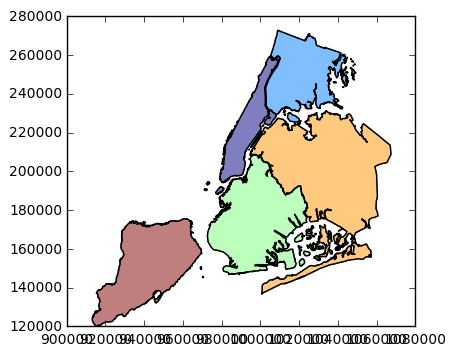

In [8]:
boros.plot()

Colormap on a column. Shading is somehow propro

Documentation (source code) states:


    Suggested values of colormap are the following:
            Accent, Dark2, Paired, Pastel1, Pastel2, Set1, Set2, Set3
        (although any matplotlib colormap will work).

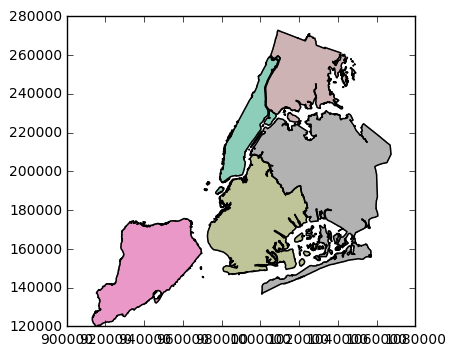

In [12]:
boros.plot(column="Shape_Area",colormap='Dark2')

In [13]:
boros.reset_index(inplace=True)
boros.set_index('BoroName', inplace=True)
boros

,BoroCode,Shape_Area,Shape_Leng,geometry
BoroName,,,,
Manhattan,1,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...
Bronx,2,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...
Brooklyn,3,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...
Queens,4,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...
Staten Island,5,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...


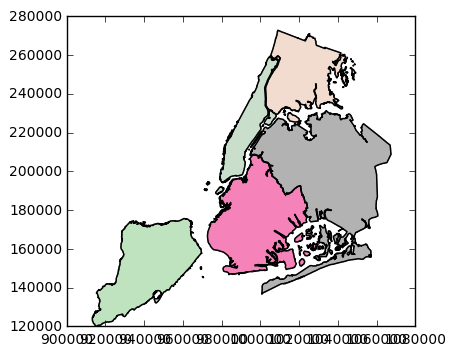

In [15]:
boros.plot(column='Shape_Leng',colormap='Accent')

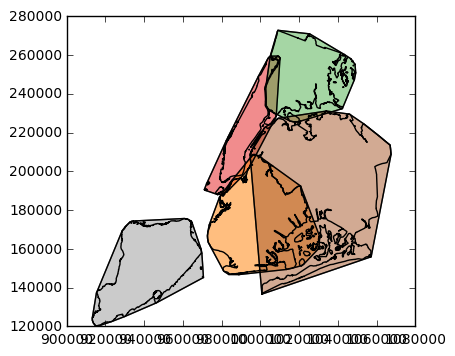

In [31]:
 boros.plot(alpha=0.0)
boros.convex_hull.plot()

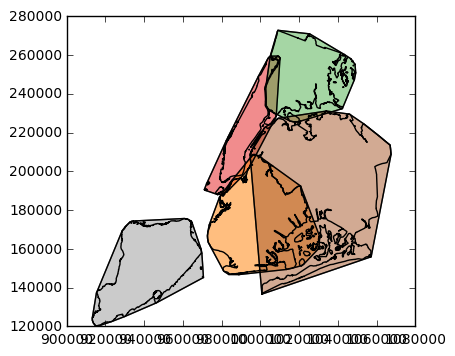

In [32]:
boros.plot(alpha=0.0)
boros.geometry.convex_hull.plot()

All places more than one mile (5280 feet) from a boundary

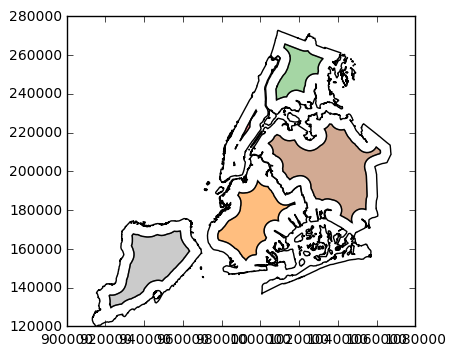

In [33]:
eroded = boros.geometry.buffer(-5280)
boros.plot(alpha=0.0)
eroded.plot()

What is the area of the eroded polygons we just calculated?

In [34]:
eroded.area

BoroName
Manhattan        1.128785e+07
Bronx            3.371876e+08
Brooklyn         6.711072e+08
Queens           1.301421e+09
Staten Island    7.263977e+08
dtype: float64

In [35]:
boros.geometry.area

BoroName
Manhattan        6.364464e+08
Bronx            1.186974e+09
Brooklyn         1.937596e+09
Queens           3.045168e+09
Staten Island    1.623829e+09
dtype: float64

What percent of boro that is more than a mile inland from a boundary?  Save this to a column

In [36]:
inland = 100.0 * eroded.area / boros.geometry.area

In [37]:
boros['inland_fraction'] = inland

In [41]:
print(boros.inland_fraction)

BoroName
Manhattan         1.773574
Bronx            28.407326
Brooklyn         34.636066
Queens           42.737251
Staten Island    44.733620
Name: inland_fraction, dtype: float64


###Shade by inland fraction

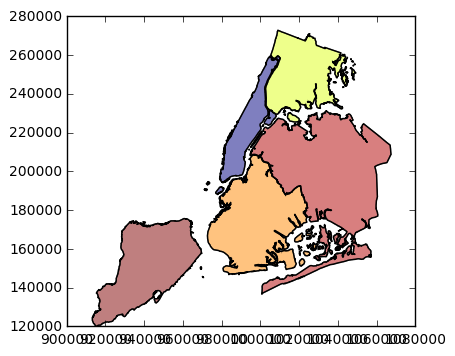

In [48]:
boros.plot(column="inland_fraction",categorical=False)

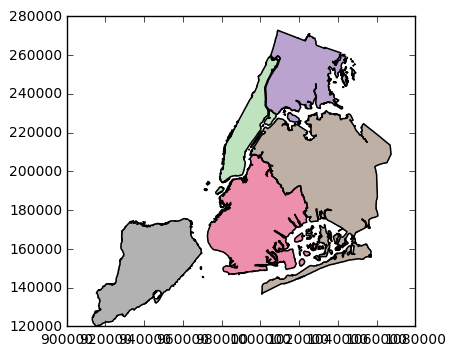

In [50]:
boros.plot(column="inland_fraction", colormap='Accent')

In [51]:
df = pd.read_csv('nyc_population.csv')
df.set_index('BoroName', inplace=True)
df

,pop_2000,pop_2010
BoroName,,
Bronx,1332650,1385108
Brooklyn,2465326,2504700
Manhattan,1537195,1585873
Queens,2229379,2230722
Staten Island,443728,468730


In [52]:
boros.join(df)

,BoroCode,Shape_Area,Shape_Leng,geometry,inland_fraction,pop_2000,pop_2010
BoroName,,,,,,,
Manhattan,1,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...,1.773574,1537195,1585873
Bronx,2,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...,28.407326,1332650,1385108
Brooklyn,3,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...,34.636066,2465326,2504700
Queens,4,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...,42.737251,2229379,2230722
Staten Island,5,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...,44.733620,443728,468730


In [54]:
boros['pop_density'] = df['pop_2010'] / boros.geometry.area * 5280 ** 2

In [55]:
boros.sort(columns='pop_density', ascending=False)

,BoroCode,Shape_Area,Shape_Leng,geometry,inland_fraction,pop_density
BoroName,,,,,,
Manhattan,1,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...,1.773574,69466.335981
Brooklyn,3,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...,34.636066,36037.963313
Bronx,2,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...,28.407326,32531.958243
Queens,4,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...,42.737251,20422.174910
Staten Island,5,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...,44.733620,8047.300267


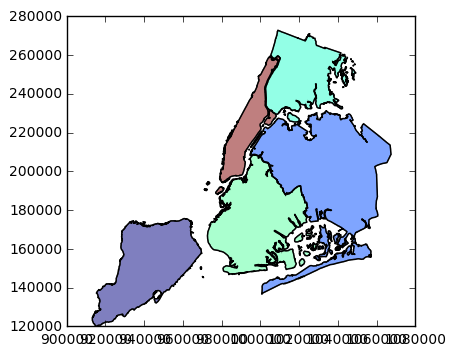

In [57]:
boros.plot(column="pop_density")

In what follows a simplified geometry is generated and then made into the 'geometry' for plotting etc

###Changing geometry

In [56]:
boros['simplified'] = boros.geometry.simplify(1000)
boros

,BoroCode,Shape_Area,Shape_Leng,geometry,inland_fraction,pop_density,simplified
BoroName,,,,,,,
Manhattan,1,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...,1.773574,69466.335981,(POLYGON ((981219.0557861328 188655.3157958984...
Bronx,2,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...,28.407326,32531.958243,(POLYGON ((1012821.805786133 229228.2645874023...
Brooklyn,3,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...,34.636066,36037.963313,(POLYGON ((1021176.479003906 151374.7969970703...
Queens,4,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...,42.737251,20422.174910,(POLYGON ((1029606.076599121 156073.8142089844...
Staten Island,5,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...,44.733620,8047.300267,(POLYGON ((970217.0223999023 145643.3322143555...


In [24]:
boros.set_geometry('simplified', inplace=True)
boros

,BoroCode,Shape_Area,Shape_Leng,geometry,inland_fraction,pop_density,simplified
BoroName,,,,,,,
Manhattan,1,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...,1.773574,69466.335981,(POLYGON ((981219.0557861328 188655.3157958984...
Bronx,2,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...,28.407326,32531.958243,(POLYGON ((1012821.805786133 229228.2645874023...
Brooklyn,3,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...,34.636066,36037.963313,(POLYGON ((1021176.479003906 151374.7969970703...
Queens,4,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...,42.737251,20422.174910,(POLYGON ((1029606.076599121 156073.8142089844...
Staten Island,5,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...,44.733620,8047.300267,(POLYGON ((970217.0223999023 145643.3322143555...


In [25]:
boros._geometry_column_name

'simplified'

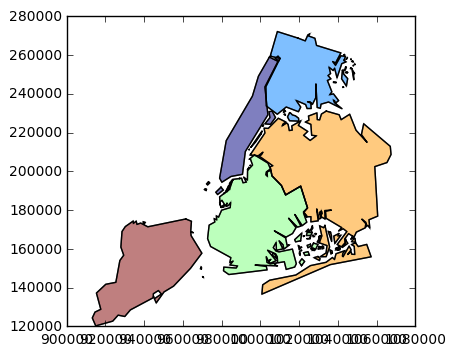

In [26]:
boros.plot()